# TFM

Cargamos las librerias principales a usar:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

Cargamos los datos desde un archivo .csv

In [3]:
datos1 = pd.read_csv("/home/michael/Kschool/TFM/Importe_Taxi/2018_Green_Taxi_Trip_Data.csv")

In [4]:
datos1.shape

(8807303, 19)

Debido a que tenemos mucha informacion extraeremos una muestra aleatgoria, exactamente el 10% de los datos:

In [5]:
datos1["key"] = range(datos1.shape[0])

In [6]:
from random import sample
total = list(datos1["key"])
muestra = sample(total,round(datos1.shape[0]*0.1))

In [7]:
datos_sample = datos1.loc[muestra]

In [8]:
datos_sample.shape

(880730, 20)

Limpiamos el campo inicio del viaje y el campo finalizacion del viaje, extrayendo el dia de semana, el dia, mes, hora, y el tiempo de duracion del viaje

In [9]:
datos_sample["lpep_pickup_datetime"] = pd.to_datetime(datos_sample["lpep_pickup_datetime"])
datos_sample["lpep_dropoff_datetime"] = pd.to_datetime(datos_sample["lpep_dropoff_datetime"])

In [10]:
datos_sample["dayofweek"] = datos_sample["lpep_pickup_datetime"].dt.dayofweek

In [11]:
datos_sample["dayofmonth"] = datos_sample["lpep_pickup_datetime"].dt.day

In [12]:
datos_sample["month"] = datos_sample["lpep_pickup_datetime"].dt.month

In [13]:
datos_sample["hora_pickup"] = datos_sample["lpep_pickup_datetime"].dt.hour * 3600
datos_sample["minute_pickup"] = datos_sample["lpep_pickup_datetime"].dt.minute * 60
datos_sample["second_pickup"] = datos_sample["lpep_pickup_datetime"].dt.second

datos_sample["hora_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.hour * 3600
datos_sample["minute_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.minute * 60
datos_sample["second_dropoff"] = datos_sample["lpep_dropoff_datetime"].dt.second

In [14]:
datos_sample["time_pickup"] = datos_sample["hora_pickup"] + datos_sample["minute_pickup"] + datos_sample["second_pickup"]
datos_sample["time_dropoff"] = datos_sample["hora_dropoff"] + datos_sample["minute_dropoff"] + datos_sample["second_dropoff"]

In [15]:
datos_sample["time_duration"] = datos_sample["time_dropoff"] - datos_sample["time_pickup"]

In [16]:
datos_sample["hora_pickup"] = datos_sample["hora_pickup"] / 3600

Cambiamos a numerico el campo "store_and_fwd_flag"

In [17]:
flag = []
for value in datos_sample["store_and_fwd_flag"]:
    if value == "N":
        flag.append(0)
    else:
        flag.append(1)

datos_sample["store_and_fwd_flag"] = flag

Limpiamos las variables que tenemos:

In [18]:
datos_sample_1 = datos_sample
#datos_sample = datos_sample_1

**time_duration**

In [19]:
datos_sample["time_duration"].describe()

count    880730.000000
mean        226.581121
std        7495.990544
min      -86377.000000
25%         378.000000
50%         651.000000
75%        1117.000000
max       86054.000000
Name: time_duration, dtype: float64

In [20]:
percentile = pd.DataFrame(datos_sample["time_duration"].quantile([0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["time_duration"]

0.000   -86377.0
0.050      146.0
0.100      223.0
0.200      328.0
0.300      427.0
0.400      531.0
0.500      651.0
0.600      798.0
0.700      991.0
0.800     1277.0
0.900     1814.0
0.975     3039.0
1.000    86054.0
Name: time_duration, dtype: float64

In [21]:
datos_sample = datos_sample[datos_sample["time_duration"] >= 240]
datos_sample = datos_sample[datos_sample["time_duration"] <= 3600]

finalmente nos quedamos con el intervalo desde 4 minutos hasta 1 hora y realizamos algunos graficos para ver la variable:

Text(0.5, 1.0, 'Tiempo Duracion')

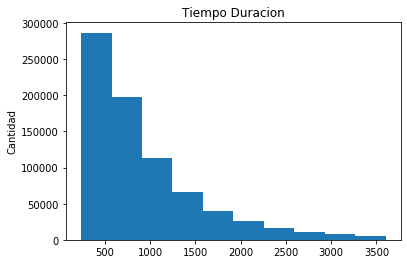

In [22]:
fig, ax = plt.subplots()

ax.hist(datos_sample["time_duration"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Tiempo Duracion')

[Text(0, 0, 'Tiempo Duracion')]

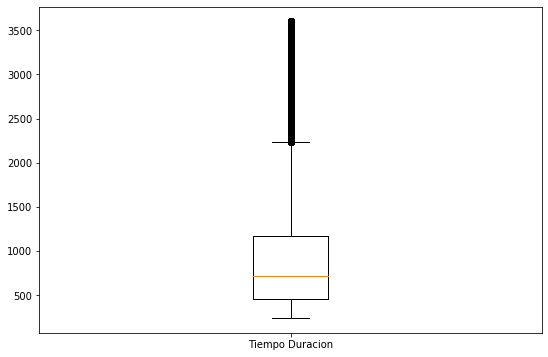

In [23]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["time_duration"])
ax.set_xticklabels(["Tiempo Duracion"])

In [25]:
VendorID = datos_sample.groupby("VendorID")["key"].count().reset_index()
VendorID.columns = ["VendorID","Cantidad"]
VendorID["VendorID"] = VendorID["VendorID"].replace(1,"Tipo_1")
VendorID["VendorID"] = VendorID["VendorID"].replace(2,"Tipo_2")

**VendorID**

Text(0.5, 1.0, 'Tipo VendorID')

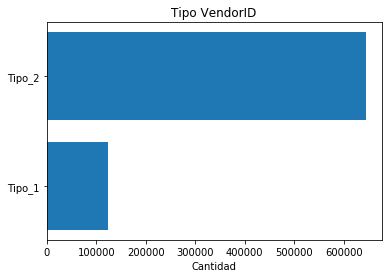

In [26]:
fig, ax = plt.subplots()

ax.barh(VendorID["VendorID"],VendorID["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Tipo VendorID')

**store_and_fwd_flag**

In [27]:
StoreFwdFlag = datos_sample.groupby("store_and_fwd_flag")["key"].count().reset_index()
StoreFwdFlag.columns = ["store_and_fwd_flag","Cantidad"]
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(0,"N")
StoreFwdFlag["store_and_fwd_flag"] = StoreFwdFlag["store_and_fwd_flag"].replace(1,"Y")

In [28]:
StoreFwdFlag

,store_and_fwd_flag,Cantidad
0,N,767319
1,Y,1324


Text(0.5, 1.0, 'Variable store_and_fwd_flag')

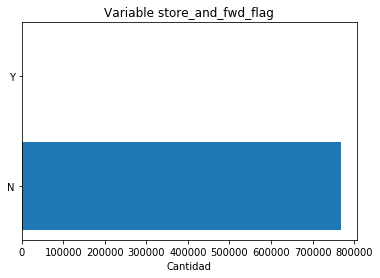

In [29]:
fig, ax = plt.subplots()

ax.barh(StoreFwdFlag["store_and_fwd_flag"],StoreFwdFlag["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Variable store_and_fwd_flag')

In [30]:
datos_sample = datos_sample[datos_sample["store_and_fwd_flag"] == 0]

finalmente en esta variable nos quedamos con el nivel "N", ya que el otro nivel "Y" tiene muy pocos registros

**RatecodeID**

In [32]:
datos_sample = datos_sample[datos_sample["RatecodeID"] != 99]

In [33]:
RateCodeID = datos_sample.groupby("RatecodeID")["key"].count().reset_index()
RateCodeID.columns = ["RatecodeID","Cantidad"]
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(1,"Tasa Estandar")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(2,"JFK")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(3,"Newark")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(4,"Nassau o Westchester")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(5,"Tarifa Negociada")
RateCodeID["RatecodeID"] = RateCodeID["RatecodeID"].replace(6,"Viaje Grupo")

In [34]:
RateCodeID

,RatecodeID,Cantidad
0,Tasa Estandar,747774
1,JFK,930
2,Newark,231
3,Nassau o Westchester,483
4,Tarifa Negociada,17901


Text(0.5, 1.0, 'RatecodeID')

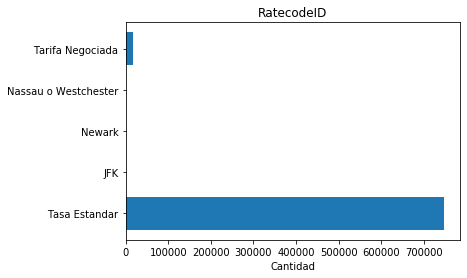

In [35]:
fig, ax = plt.subplots()

ax.barh(RateCodeID["RatecodeID"],RateCodeID["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('RatecodeID')

In [36]:
datos_sample = datos_sample[datos_sample["RatecodeID"] == 1]

finalmente en esta variable nos quedamos con el nivel "Tasa Estandar", ya que los demas niveles tienen muy poca informacion

**passenger_count**

In [37]:
Pasenger = datos_sample.groupby("passenger_count")["key"].count().reset_index()
Pasenger.columns = ["passenger_count","Cantidad"]

In [38]:
Pasenger

,passenger_count,Cantidad
0,0,957
1,1,632392
2,2,58071
3,3,12367
4,4,4351
5,5,25919
6,6,13717


Text(0.5, 1.0, 'Numero Pasajeros')

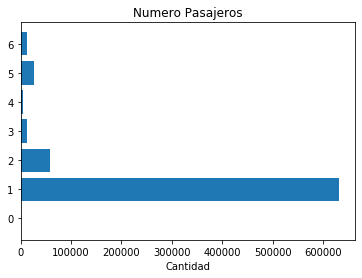

In [39]:
fig, ax = plt.subplots()

ax.barh(Pasenger["passenger_count"],Pasenger["Cantidad"])
ax.set_xlabel('Cantidad')
ax.set_title('Numero Pasajeros')

In [40]:
datos_sample = datos_sample[datos_sample["passenger_count"] > 0]

Finalmente en esta variables nos quedamos con al menos un pasajero en el viaje 

**trip_distance**

In [41]:
datos_sample["trip_distance"].describe()

count    746817.000000
mean          3.153441
std           3.070368
min           0.000000
25%           1.240000
50%           2.090000
75%           3.840000
max         120.470000
Name: trip_distance, dtype: float64

In [42]:
percentile = pd.DataFrame(datos_sample["trip_distance"].quantile([0, 0.025, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["trip_distance"]

0.000      0.00
0.025      0.60
0.100      0.87
0.200      1.11
0.300      1.38
0.400      1.69
0.500      2.09
0.600      2.61
0.700      3.35
0.800      4.51
0.900      6.86
0.975     12.02
1.000    120.47
Name: trip_distance, dtype: float64

In [43]:
datos_sample = datos_sample[datos_sample["trip_distance"] >= 0.5]
datos_sample = datos_sample[datos_sample["trip_distance"] <= 12]

Finalmente en esta variable nos quedamos con el intervalo entre 500 metros hasta 12 kilometros y realizamos algunos graficos para ver la distribucion de la variable

Text(0.5, 1.0, 'Distancia')

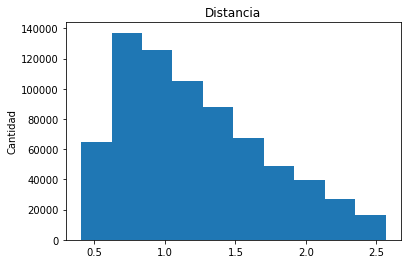

In [44]:
fig, ax = plt.subplots()

ax.hist(np.log1p(datos_sample["trip_distance"]))
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Distancia')

[Text(0, 0, 'Distancia')]

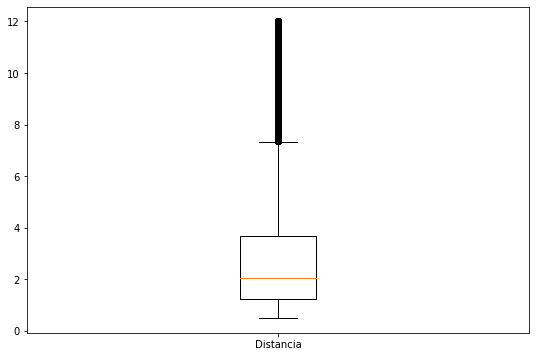

In [45]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["trip_distance"])
ax.set_xticklabels(["Distancia"])

**payment_type**

In [46]:
PaymentType = datos_sample.groupby("payment_type")["key"].count().reset_index()
PaymentType.columns = ["payment_type","Cantidad"]
PaymentType["payment_type"] = PaymentType["payment_type"].replace(1,"Tarjeta Credito")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(2,"Efectivo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(3,"Sin Cargo")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(4,"Disputa")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(5,"Desconocido")
PaymentType["payment_type"] = PaymentType["payment_type"].replace(6,"Viaje Vacio")

In [47]:
PaymentType

,payment_type,Cantidad
0,Tarjeta Credito,413202
1,Efectivo,304848
2,Sin Cargo,1427
3,Disputa,926
4,Desconocido,16


Text(0.5, 1.0, 'Tipo Pago')

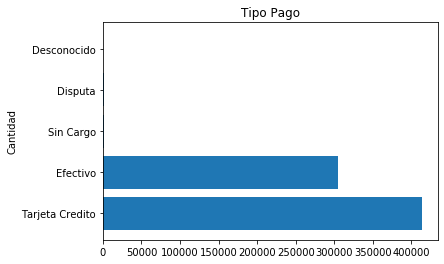

In [48]:
fig, ax = plt.subplots()

ax.barh(PaymentType["payment_type"],PaymentType["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Tipo Pago')

In [49]:
datos_sample = datos_sample[datos_sample["payment_type"] <= 2]

Finalmente en esta variable nos quedamos con los niveles "tarjeta Credito" y "Efectivo", ya que los otros niveles tienen muy poca informacion

**dayofweek**

In [50]:
DayofWeek = datos_sample.groupby("dayofweek")["key"].count().reset_index()
DayofWeek.columns = ["dayofweek","Cantidad"]
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(0,"Lunes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(1,"Martes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(2,"Miercoles")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(3,"Jueves")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(4,"Viernes")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(5,"Sabado")
DayofWeek["dayofweek"] = DayofWeek["dayofweek"].replace(6,"Domingo")

In [51]:
DayofWeek

,dayofweek,Cantidad
0,Lunes,94071
1,Martes,97302
2,Miercoles,99424
3,Jueves,103525
4,Viernes,114425
5,Sabado,115369
6,Domingo,93934


Text(0.5, 1.0, 'Dia Semana')

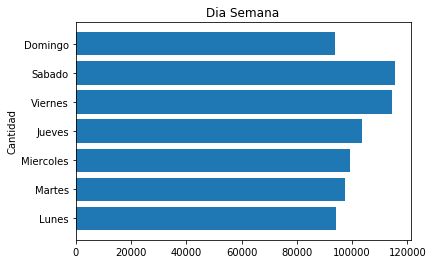

In [52]:
fig, ax = plt.subplots()

ax.barh(DayofWeek["dayofweek"],DayofWeek["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Dia Semana')

**dayofmonth**

In [53]:
DayofMonth = datos_sample.groupby("dayofmonth")["key"].count().reset_index()
DayofMonth.columns = ["dayofmonth","Cantidad"]

Text(0.5, 1.0, 'Dia Mes')

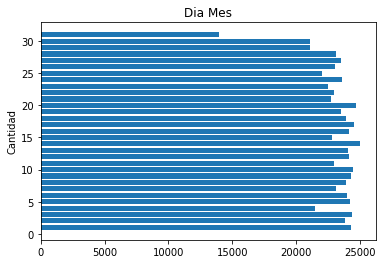

In [54]:
fig, ax = plt.subplots()

ax.barh(DayofMonth["dayofmonth"],DayofMonth["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Dia Mes')

**month**

In [55]:
Month = datos_sample.groupby("month")["key"].count().reset_index()
Month.columns = ["month","Cantidad"]

Text(0.5, 1.0, 'Mes')

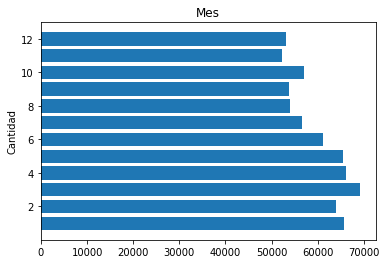

In [56]:
fig, ax = plt.subplots()

ax.barh(Month["month"],Month["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Mes')

**hora**

In [57]:
Hora = datos_sample.groupby("hora_pickup")["key"].count().reset_index()
Hora.columns = ["hora_pickup","Cantidad"]

Text(0.5, 1.0, 'Hora')

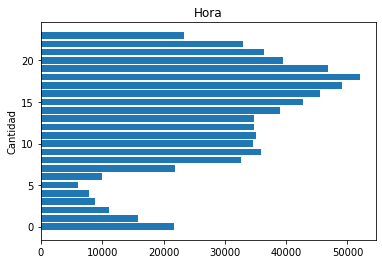

In [58]:
fig, ax = plt.subplots()

ax.barh(Hora["hora_pickup"],Hora["Cantidad"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Hora')

**total_amount**

In [59]:
datos_sample["total_amount"].describe()

count    718050.000000
mean         14.842254
std           8.079523
min          -7.800000
25%           8.800000
50%          12.300000
75%          18.300000
max         229.800000
Name: total_amount, dtype: float64

In [60]:
percentile = pd.DataFrame(datos_sample["total_amount"].quantile([0, 0.025, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.975, 1]))
percentile["total_amount"]

0.000     -7.80
0.025      6.30
0.100      7.30
0.200      8.30
0.300      9.36
0.400     10.80
0.500     12.30
0.600     14.16
0.700     16.56
0.800     20.30
0.900     26.76
0.975     36.62
1.000    229.80
Name: total_amount, dtype: float64

In [61]:
datos_sample = datos_sample[datos_sample["total_amount"] >= 5]
datos_sample = datos_sample[datos_sample["total_amount"] <= 40]

finalmente en esta variable nos quedamos con el intervalo entre 5 y 40 y realizamos algunos graficos para ver la distribucion de la variable

Text(0.5, 1.0, 'Pago Total')

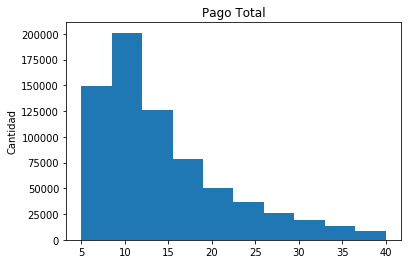

In [62]:
fig, ax = plt.subplots()

ax.hist(datos_sample["total_amount"])
ax.set_axisbelow(True)
ax.set_ylabel('Cantidad')
ax.set_title('Pago Total')

[Text(0, 0, 'Pago Total')]

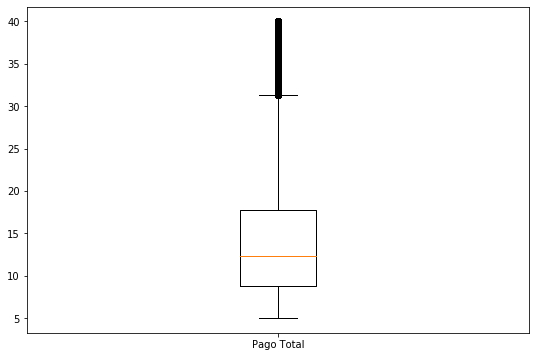

In [63]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))
# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
ax.boxplot(datos_sample["total_amount"])
ax.set_xticklabels(["Pago Total"])

Seleccionamos las variables a considerar en el modelo

In [64]:
datos_sample2 = datos_sample[["key","VendorID","PULocationID","DOLocationID","passenger_count","trip_distance",
                              "payment_type","total_amount","hora_pickup","dayofweek","dayofmonth","month","time_duration"]]
#"borough_pickup","borough_dropoff","zone_pickup","zone_dropoff"
datos_sample2["key"] = range(datos_sample2.shape[0])

/home/michael/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Realizamos el grafico de correlacion de variables

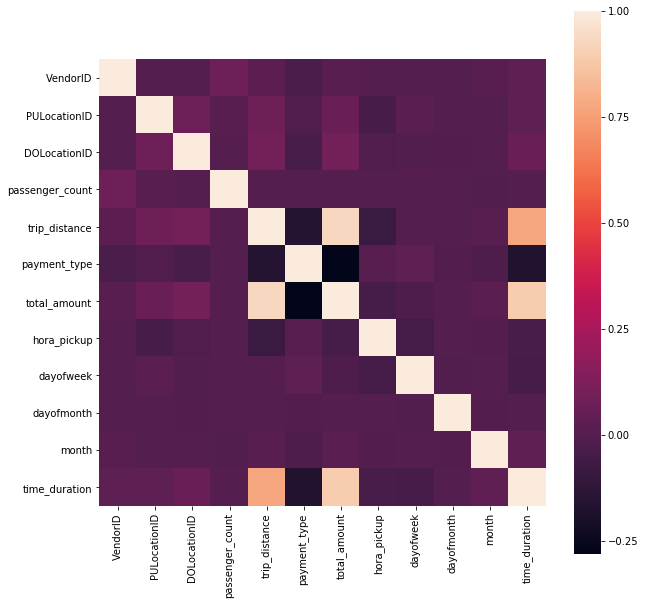

In [65]:
#correlation matrix
cols = ["VendorID","PULocationID","DOLocationID","passenger_count","trip_distance",
        "payment_type","total_amount","hora_pickup","dayofweek","dayofmonth","month",
        "time_duration"]
corrmat = datos_sample2[cols].corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

Realizamos el grafico de relacion de variables viendo la distribucion de cada una de ellas

In [66]:
from random import sample
total = list(datos_sample2["key"])
muestra = sample(total,round(datos_sample2.shape[0]*0.05))

In [67]:
datos_sample2 = datos_sample2.reset_index()
datos_sample2 = datos_sample2.drop("index",axis = 1)
datos_sample_corr = datos_sample2.loc[muestra]

datos_sample_corr.shape

(35435, 13)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


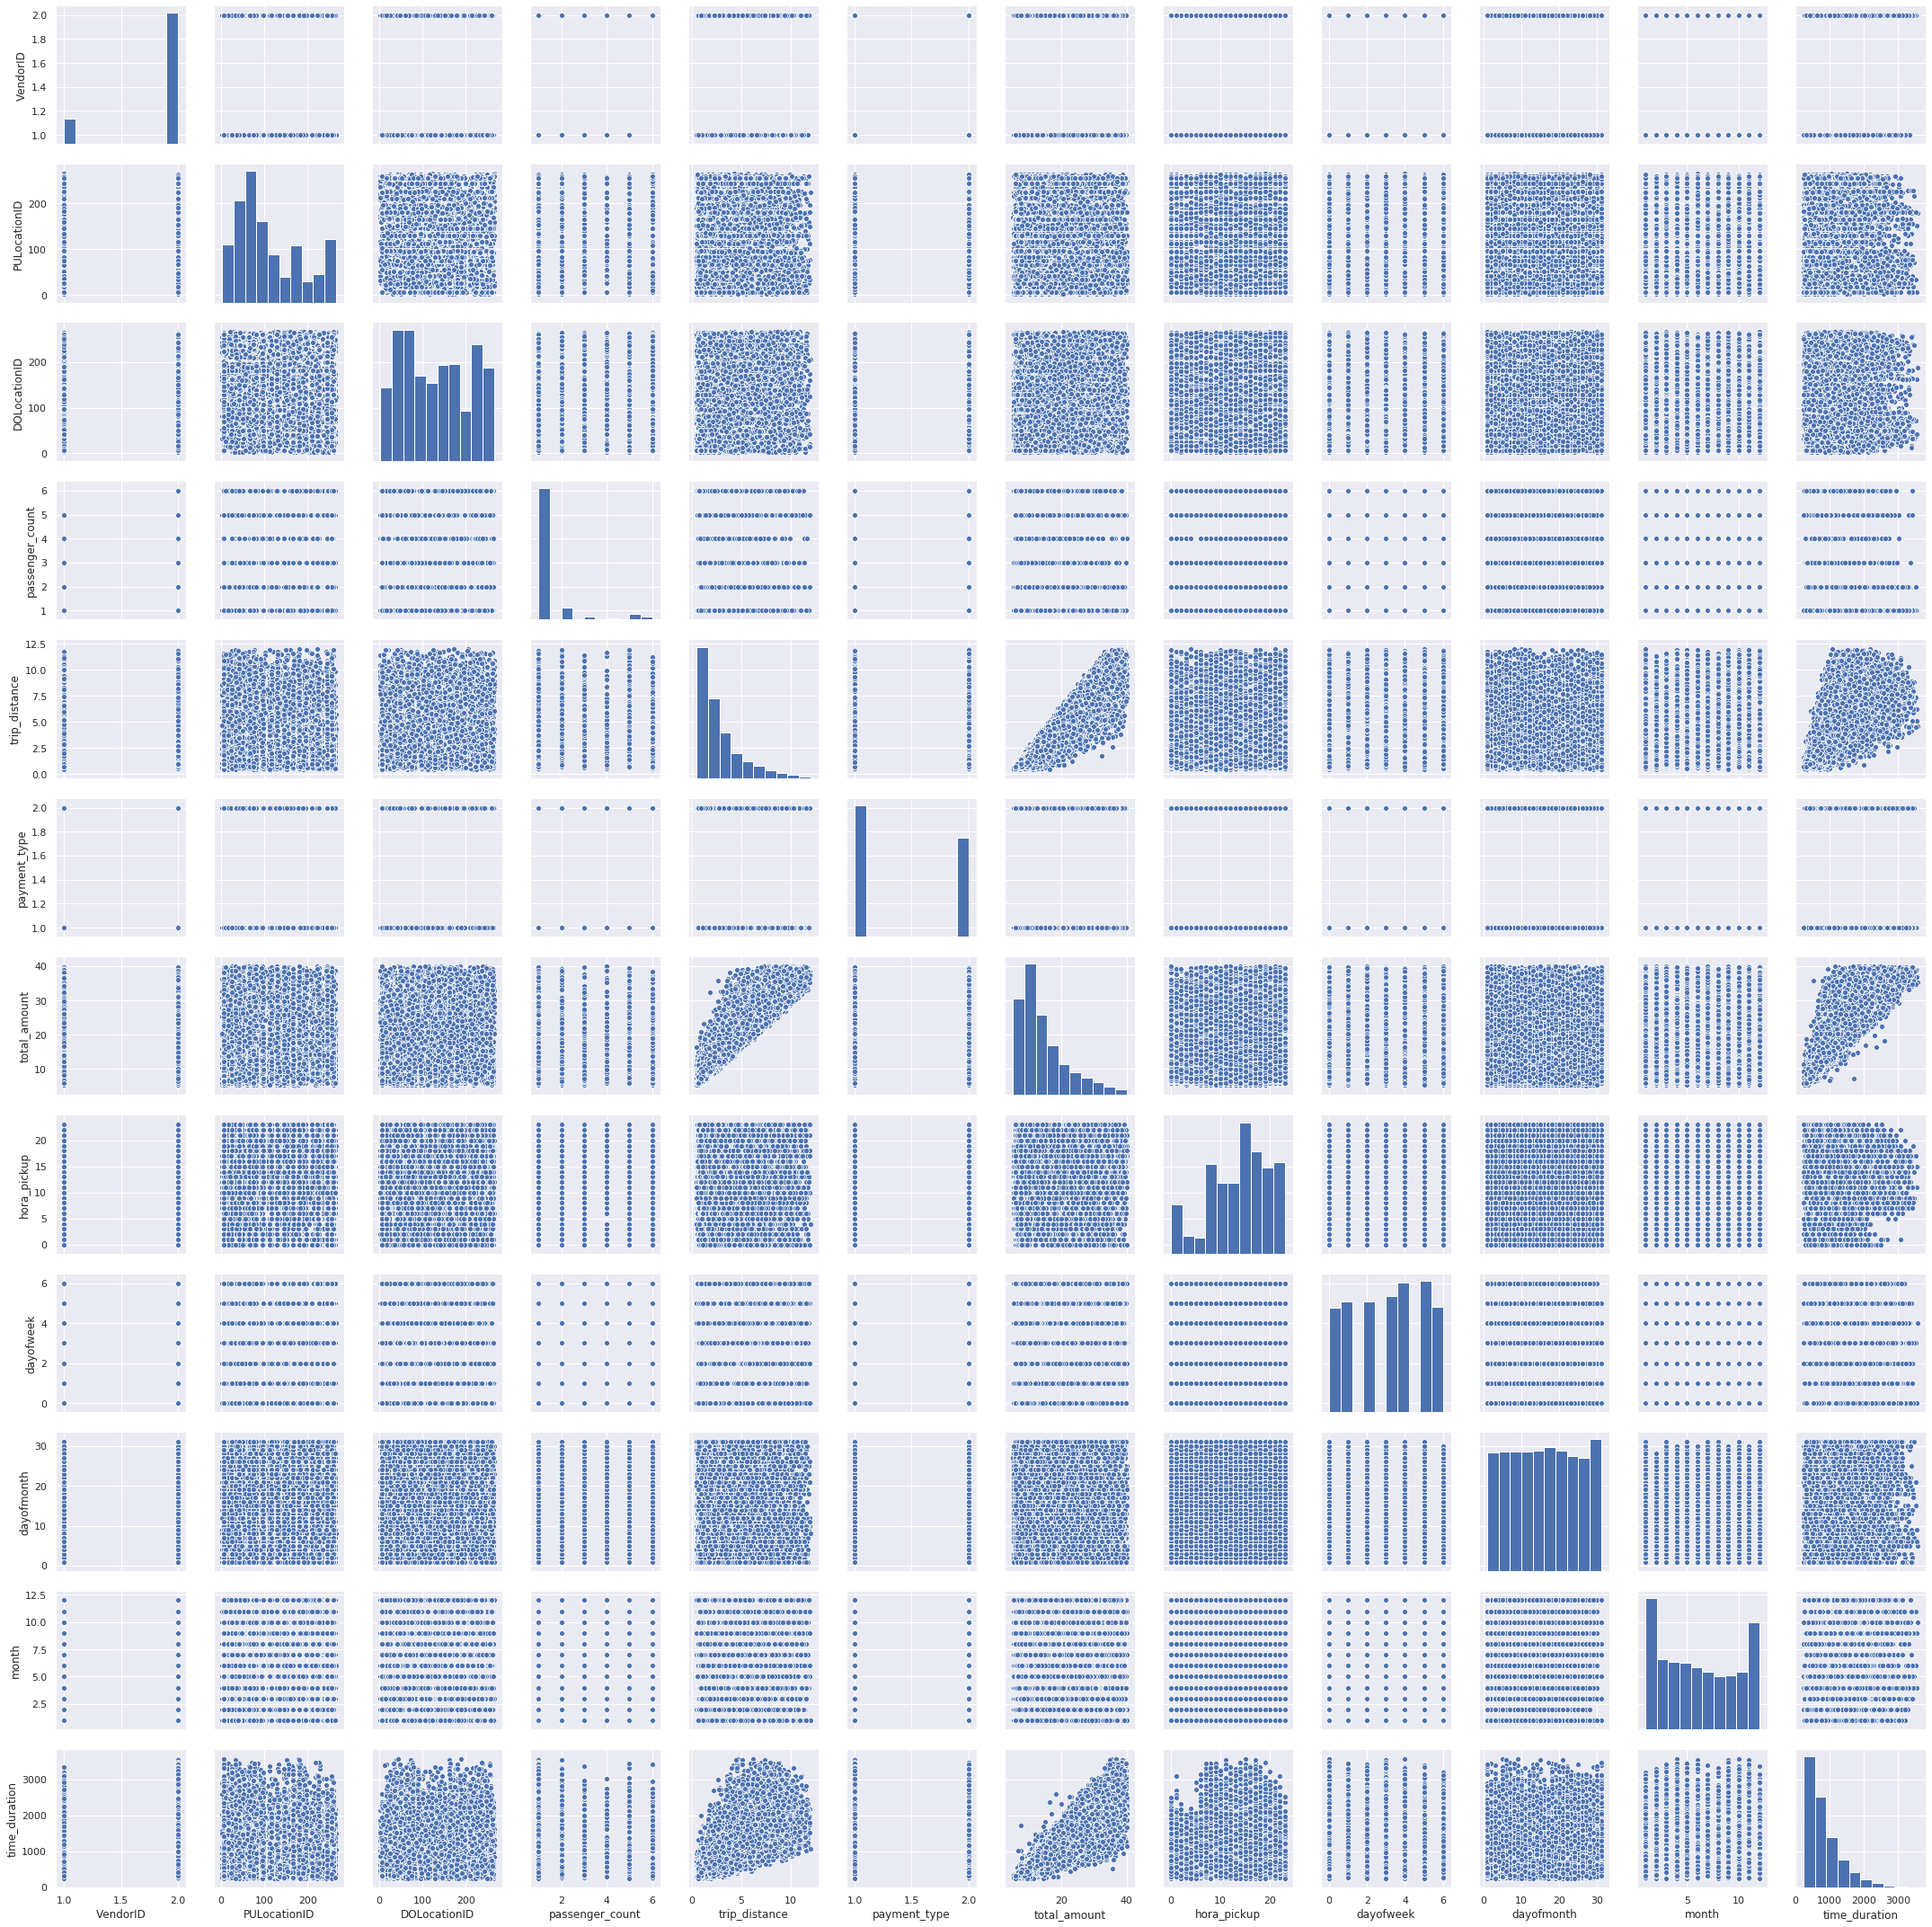

In [68]:
#scatterplot de las columnas más influyentes
sns.set()
sns.pairplot(datos_sample_corr[cols], size = 2.5)
plt.show();

Verificamos que no tengamos datos nulos

In [69]:
datos_sample2.isnull().sum()

key                0
VendorID           0
PULocationID       0
DOLocationID       0
passenger_count    0
trip_distance      0
payment_type       0
total_amount       0
hora_pickup        0
dayofweek          0
dayofmonth         0
month              0
time_duration      0
dtype: int64

Vamos a cambiar de escala a todas las variables numericas para utilizar la regresion lineal

In [71]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()

In [72]:
X_num = datos_sample2.drop(["key","time_duration","total_amount"],axis = 1)
X_scaled = rbs.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['VendorID', 'PULocationID', 'DOLocationID', 'passenger_count', "trip_distance", 'payment_type',
                    'hora_pickup', 'dayofweek', 'dayofmonth', 'month']

In [73]:
X_scaled["key1"] = range(X_scaled.shape[0])
X = X_scaled
y = datos_sample2["time_duration"]

Particionamos los datos en train-test

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5,random_state = 42)

In [75]:
Val_train = pd.DataFrame(X_train["key1"])
Val_test = pd.DataFrame(X_test["key1"])
X_train = X_train.drop("key1",axis = 1)
X_test = X_test.drop("key1",axis = 1)

In [76]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((354353, 10), (354353,), (354353, 10), (354353,))

Probaremos inicialmente modelos basicos como la regresion lineal y sus variantes:

**Modelo Regresion Lineal**

In [77]:
from sklearn.linear_model import LinearRegression
rl = LinearRegression()

In [78]:
mod_rl = rl.fit(X_train,y_train)

In [79]:
pred_rl = mod_rl.predict(X_test)

**Metricas**

In [80]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rl),mean_squared_error(y_test,pred_rl)**(0.5)

(112090.52433611391, 334.79922989175753)

In [81]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rl)

229.32945582354725

In [82]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rl)

30.159129032749878

Vemos que el porcentaje de error entre el time_duration y la prediccion es 30% aproximadamente. Asimismo realizaremos la correlacion pearson entre estos dos valores

In [83]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_rl)

0.7765231493486114

No esta mal para ser un modelo basico. Ahora probaremos las variantes de la regresion lineal utilizando modelos con penalizacion

**Modelo Lasso**

In [85]:
from sklearn.linear_model import Lasso
lasso_ = Lasso(alpha = 0.001)

In [86]:
mod_lasso = lasso_.fit(X_train,y_train)

In [87]:
pred_lasso = mod_lasso.predict(X_test)

**Metricas**

In [88]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lasso),mean_squared_error(y_test,pred_lasso)**(0.5)

(112090.52511954533, 334.7992310617594)

In [89]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lasso)

229.32943946060846

In [90]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lasso)

30.15914799900487

In [91]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_lasso)

0.7765231406170903

**Modelo Rigde**

In [92]:
from sklearn.linear_model import Ridge
ridge_ = Ridge(alpha = 10000)

In [93]:
mod_ridge = ridge_.fit(X_train,y_train)

In [94]:
pred_ridge = mod_ridge.predict(X_test)

**Metricas**

In [95]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_ridge),mean_squared_error(y_test,pred_ridge)**(0.5)

(112278.16122530072, 335.0793357181262)

In [96]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_ridge)

231.02304196084168

In [97]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_ridge)

30.844807974718925

In [98]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test(y_test,pred_ridge)

0.7764805503868171

Segun los resultamos de los modelos LASSO y RIDGE no mejoran los resultados, por lo que probaremos modelos de arboles ensamblados 

**Modelo GBM**

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor()

In [100]:
mod_gbm = gbm.fit(X_train,y_train)

In [101]:
pred_gbm = mod_gbm.predict(X_test)

**Metricas**

In [102]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_gbm),mean_squared_error(y_test,pred_gbm)**(0.5)

(79538.45923079108, 282.0256357687916)

In [103]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_gbm)

187.3695192220468

In [104]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_gbm)

23.304639104614793

In [105]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_gbm))

0.8479523652562966

**Modelo RandomForest**

In [106]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [107]:
mod_rf = rf.fit(X_train,y_train)

/home/michael/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
pred_rf = mod_rf.predict(X_test)

**Metricas**

In [109]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_rf),mean_squared_error(y_test,pred_rf)**(0.5)

(75051.03131564092, 273.9544329183978)

In [110]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_rf)

183.2155853962145

In [111]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_rf)

22.895252195287526

In [112]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_rf))

0.8576030592955044

Observamos que los arboles ensamblados GBM y RANDOMFOREST obtienen mejores resultados. Finalmente probaremos el algoritmo lightgbm tuneando sus hyperparametros

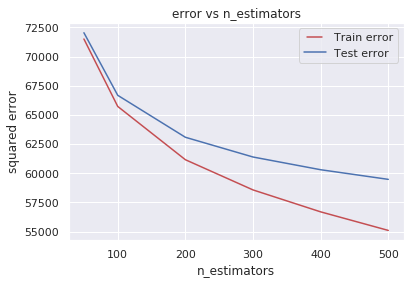

In [114]:
from lightgbm import LGBMRegressor

n_estimators = [50,100,200,300,400,500]

train_result = []
test_result = []
for estimator in n_estimators:
    lgbm = LGBMRegressor(n_estimators=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(n_estimators, train_result, "r", label="Train error")
line2, = plt.plot(n_estimators, test_result, "b", label="Test error")
plt.title('error vs n_estimators')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('n_estimators')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("n_estimators")
plt.show()

In [ ]:
train_result,test_result

In [119]:
np.array(train_result)-np.array(test_result)

array([ -536.44562876,  -954.00200123, -1923.47556958, -2820.64246642,
       -3610.67937676, -4375.70036924])

Vemos que conforme aumenta el numero de arboles aumenta overfiting, por lo que nos quedaremos con 200 arboles

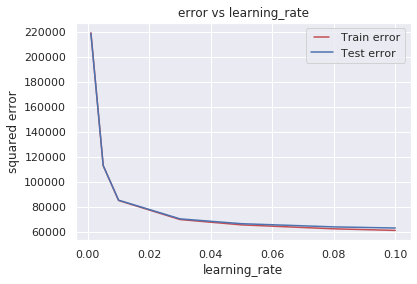

In [121]:
learn_rate_ = [0.001,0.005,0.01,0.03,0.05,0.08,0.1]

train_result = []
test_result = []
for estimator in learn_rate_:
    lgbm = LGBMRegressor(n_estimators=200,learning_rate=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(learn_rate_, train_result, "r", label="Train error")
line2, = plt.plot(learn_rate_, test_result, "b", label="Test error")
plt.title('error vs learning_rate')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('learning_rate')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("learning_rate")
plt.show()

In [122]:
train_result,test_result

([219444.2573058597,
  113010.02293610666,
  85135.75192173933,
  69857.76404718461,
  65599.64666629105,
  62439.18636661541,
  61159.00636586775],
 [218899.14746519702,
  113037.65184922624,
  85379.13075575026,
  70408.04919836536,
  66537.98206573396,
  63988.16346810891,
  63082.48193545025])

In [123]:
np.array(train_result)-np.array(test_result)

array([  545.10984066,   -27.62891312,  -243.37883401,  -550.28515118,
        -938.33539944, -1548.97710149, -1923.47556958])

Como vemos que la diferencia es minima en todos los valores del train y test en este parametro tomaremos el valor maximo 0.1  

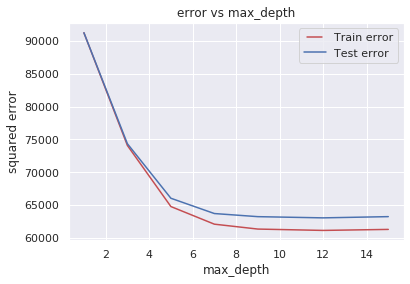

In [124]:
max_depth_ = [1,3,5,7,9,12,15]

train_result = []
test_result = []
for estimator in max_depth_:
    lgbm = LGBMRegressor(n_estimators=200,learning_rate=0.1,max_depth=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depth_, train_result, "r", label="Train error")
line2, = plt.plot(max_depth_, test_result, "b", label="Test error")
plt.title('error vs max_depth')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('max_depth')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("max_depth")
plt.show()

In [125]:
train_result,test_result

([91275.32708998771,
  74079.4931966053,
  64765.414129789955,
  62075.62766371249,
  61329.115708976744,
  61123.43131869349,
  61277.849394341865],
 [91277.83800825404,
  74346.18650324567,
  66030.82959286084,
  63698.596175909086,
  63222.291338373914,
  63038.20783073191,
  63226.06578652109])

In [126]:
np.array(train_result)-np.array(test_result)

array([   -2.51091827,  -266.69330664, -1265.41546307, -1622.9685122 ,
       -1893.1756294 , -1914.77651204, -1948.21639218])

Vemos que conforme se considera mas profundidad de arboles empieza a verse overfiting, consideraremos el valor 12 

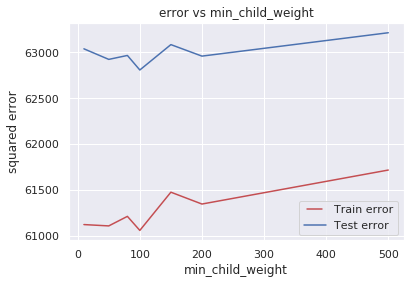

In [127]:
min_child_ = [10,50,80,100,150,200,500]

train_result = []
test_result = []
for estimator in min_child_:
    lgbm = LGBMRegressor(n_estimators=200,learning_rate=0.1,max_depth=12,min_child_weight=estimator)
    lgbm.fit(X_train, y_train)
    
    train_pred = lgbm.predict(X_train)
    mean_squared_error_ = mean_squared_error(y_train,lgbm.predict(X_train))
    train_result.append(mean_squared_error_)
    
    test_pred = lgbm.predict(X_test)
    mean_squared_error_ = mean_squared_error(y_test,lgbm.predict(X_test))
    test_result.append(mean_squared_error_)

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_child_, train_result, "r", label="Train error")
line2, = plt.plot(min_child_, test_result, "b", label="Test error")
plt.title('error vs min_child_weight')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.xlabel('min_child_weight')
plt.ylabel('error')
plt.ylabel("squared error")
plt.xlabel("min_child_weight")
plt.show()

In [128]:
train_result,test_result

([61123.43131869349,
  61108.86955210372,
  61212.821357650275,
  61059.76493978699,
  61476.21922224124,
  61347.15890633931,
  61717.491029838],
 [63038.20783073191,
  62923.0651703768,
  62965.95466223536,
  62807.52492128013,
  63084.01092328143,
  62958.69085233389,
  63213.31261464466])

In [129]:
np.array(train_result)-np.array(test_result)

array([-1914.77651204, -1814.19561827, -1753.13330459, -1747.75998149,
       -1607.79170104, -1611.53194599, -1495.82158481])

Vemos que conforme aumenta el valor del parametro el error aumenta, por lo que consideraremos 100

In [130]:
from lightgbm import LGBMRegressor

lightgbm = LGBMRegressor(n_estimators = 200,learning_rate = 0.1,max_depth = 12,min_child_weight = 100)
mod_lightgbm = lightgbm.fit(X_train,y_train)

In [131]:
pred_lightgbm = mod_lightgbm.predict(X_test)

**Metricas**

In [132]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,pred_lightgbm),mean_squared_error(y_test,pred_lightgbm)**(0.5)

(62807.52492128013, 250.61429512555767)

In [133]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,pred_lightgbm)

166.0515031508314

In [134]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_test,pred_lightgbm)

20.587959667383206

In [135]:
# Correlation
def corr_test(y_true,y_pred):
    return np.corrcoef(y_true,y_pred)[0][1]

corr_test((y_test),(pred_lightgbm))

0.8819332612829254

Finalmente observamos que el modelo lightgbm con los parametros tuneados mejora incluso a los GBM y RANDOMFOREST, por lo que nos quedaremos con este modelo

**Observamos la importancia de variables**

In [136]:
importance = pd.DataFrame(mod_lightgbm.feature_importances_, index=X_train.columns).reset_index()
importance.columns = ["importance_var","value"]
importance = importance.sort_values("value",ascending = True)

Text(0.5, 1.0, 'Importancia de Variables')

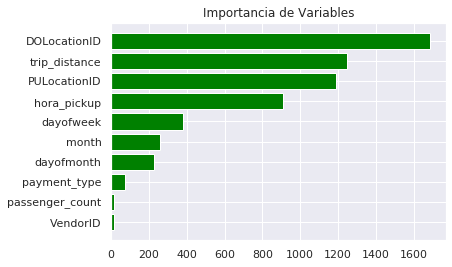

In [137]:
fig, ax = plt.subplots()

ax.barh(importance["importance_var"],importance["value"],align='center',color='green')
ax.set_title('Importancia de Variables')

In [138]:
importance.sort_values("value",ascending = False)

,importance_var,value
2,DOLocationID,1684
4,trip_distance,1248
1,PULocationID,1191
6,hora_pickup,911
7,dayofweek,378
9,month,259
8,dayofmonth,225
5,payment_type,74
0,VendorID,15
3,passenger_count,15


De acuerdo al grafico vemos que las principales variables son el inicio del recorrido, la distancia de viaje, el final del recorrido y la hora en la que toma el viaje

**Revisando predicciones**

In [139]:
Val_train.columns = ["key"]
Val_test.columns = ["key"]

datos_sample_train = datos_sample2.merge(Val_train)
datos_sample_test = datos_sample2.merge(Val_test)

In [140]:
datos_sample_train.shape,datos_sample_test.shape

((354353, 13), (354353, 13))

In [141]:
Val_test["key1"] = range(Val_test.shape[0])
prediccion = pd.DataFrame(pred_lightgbm)
prediccion["key1"] = range(prediccion.shape[0])

prediccion = prediccion.merge(Val_test)
prediccion = prediccion.drop("key1",axis = 1)
prediccion.columns = ["pred_time_duration","key"]
datos_sample_test = datos_sample_test.merge(prediccion)

Verificaremos la calidad de las predicciones

In [142]:
datos_sample_test["range_dif"] = np.abs(datos_sample_test["time_duration"] - datos_sample_test["pred_time_duration"])

In [143]:
datos_sample_test["perc_dif"] = datos_sample_test["range_dif"] / datos_sample_test["time_duration"]

In [144]:
percentile = pd.DataFrame(datos_sample_test["perc_dif"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))
percentile

,perc_dif
0.0,0.000001
0.1,0.029613
0.2,0.059553
0.3,0.091070
0.4,0.124241
0.5,0.160830
0.6,0.202867
0.7,0.253488
0.8,0.321715
0.9,0.433499


In [145]:
datos_sample_test["perc_dif"].describe()

count    354353.000000
mean          0.205880
std           0.181617
min           0.000001
25%           0.075194
50%           0.160830
75%           0.284466
max           3.158914
Name: perc_dif, dtype: float64

Observamos que el porcentaje de error entre el tiempo_duration y la prediccion es minimo, por lo que hasta el percentil 90 de los datos la diferencia es minima. Entonces podemos concluir que tenemos una buena prediccion del tiempo duracion del viaje

**Como valor agregado revisaremos las zonas que generan mayor ingreso y el tiempo_duration de esas zonas**

In [146]:
import shapefile as shp

sf = shp.Reader("/home/michael/Kschool/TFM/Importe_Taxi/taxi_zones/taxi_zones.shp")

In [147]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [148]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df

In [149]:
import seaborn as sns

def calc_color(data, color=None):
    if color   == 1: 
        color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0']; 
        colors = 'Purples';
    elif color == 2:
        color_sq = ['#c7e9b4','#7fcdbb','#41b6c4', '#1d91c0','#225ea8','#253494']; 
        colors = 'YlGnBu';
    elif color == 3: 
        color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd', '#969696','#636363','#252525']; 
        colors = 'Greys';
    elif color == 9: 
        color_sq = ['#ff0000','#ff0000','#ff0000', '#ff0000','#ff0000','#ff0000']
    else:
        color_sq = ['#ffffd4','#fee391','#fec44f', '#fe9929','#d95f0e','#993404'];        
        colors = 'YlOrBr';
    new_data, bins = pd.qcut(data, 6, retbins=True, labels=list(range(6)))
    color_ton = []
    for val in new_data:
        color_ton.append(color_sq[val]) 
    if color != 9:
        colors = sns.color_palette(colors, n_colors=6)
        sns.palplot(colors, 0.6);
    for i in range(6):
        print ("\n"+str(i+1)+': '+str(int(bins[i]))+" => "+str(int(bins[i+1])-1), end =" ")
        print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

In [150]:
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [151]:
def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.zone == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));

In [152]:
df = read_shapefile(sf)

In [153]:
df_location = datos_sample_test.groupby("PULocationID")["total_amount"].sum().reset_index()
df_location.columns = ["LocationID","total_amount"]

In [154]:
df = df.merge(df_location)


1: 9 => 139 

   1   2   3   4   5   6


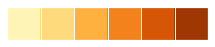

<Figure size 792x648 with 0 Axes>

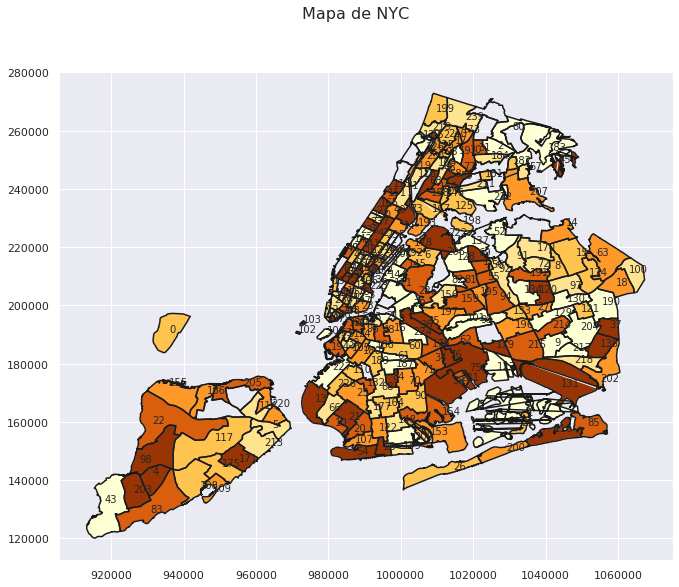

In [155]:
title = "Mapa de NYC"
names = list(df["zone"])
data = list(df["total_amount"])

plot_comunas_data(sf,title,names, data, 5, True)

En el grafico podemos observar que las zonas con el color mas fuerte indican las que generan mayor cantidad de ingresos

**Top 10 zonas con mas recaudacion de dinero**

In [156]:
df.sort_values("total_amount",ascending = False).head(10)

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,coords,total_amount
67,74,0.110291,0.000295,East Harlem North,74,Manhattan,"[(1002572.2760010064, 236761.57440185547), (10...",322726.35
68,75,0.087664,0.000241,East Harlem South,75,Manhattan,"[(1000577.174697876, 228028.552730456), (10012...",270061.32
36,41,0.052793,0.000143,Central Harlem,41,Manhattan,"[(998716.9128961712, 234240.39717498422), (999...",238721.16
75,82,0.119876,0.000324,Elmhurst,82,Queens,"[(1020914.1317107975, 210389.71388940513), (10...",211297.02
4,7,0.107417,0.000390,Astoria,7,Queens,"[(1010804.2179628164, 218919.64069513977), (10...",195954.90
152,166,0.068824,0.000255,Morningside Heights,166,Manhattan,"[(996131.212920785, 235950.77747422457), (9963...",189774.00
89,97,0.062476,0.000163,Fort Greene,97,Brooklyn,"[(992751.6986956745, 192765.1403606385), (9928...",151773.94
28,33,0.053270,0.000147,Brooklyn Heights,33,Brooklyn,"[(985305.7563099563, 195535.75502961874), (985...",151335.45
223,244,0.080569,0.000360,Washington Heights South,244,Manhattan,"[(1000658.6903420687, 249440.20533962548), (10...",150003.44
37,42,0.092709,0.000264,Central Harlem North,42,Manhattan,"[(1002413.1913817227, 243934.56038284302), (10...",147254.63


**Revisando el tiempo de duracion de las 5 zonas que mas recaudan**

**1**

In [157]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 74]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,75,27312.58,8.80,7.475000,8.463486
1,236,21114.21,11.80,11.166667,11.805153
2,41,19732.55,8.16,6.916667,6.568974
3,42,19692.83,8.80,8.025000,7.885033
4,166,17833.61,11.30,11.200000,10.670770
5,263,15908.37,12.30,10.783333,11.274190
6,238,13867.53,14.80,14.733333,14.835255
7,74,11578.74,7.30,6.050000,6.404364
8,239,10969.48,17.16,17.275000,17.600633
9,244,9906.60,17.30,17.266667,17.904444


**2**

In [158]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 75]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,74,27491.99,8.30,5.900000,7.338496
1,236,12341.11,8.76,7.050000,7.419908
2,42,12059.40,11.30,10.533333,12.115926
3,41,11924.92,8.80,7.366667,7.997619
4,238,10800.53,9.96,8.400000,8.518761
5,75,10673.61,7.30,6.133333,6.123540
6,263,10017.71,8.97,7.366667,7.735356
7,237,8815.68,12.30,12.216667,12.175511
8,166,7059.68,11.80,11.233333,12.109131
9,141,6306.32,12.80,12.200000,12.127414


**3**

In [159]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 41]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,42,26540.30,8.30,6.525000,7.001301
1,74,21926.35,8.30,7.250000,6.995107
2,166,11812.66,8.30,6.750000,7.167534
3,116,10595.63,10.30,9.333333,10.016727
4,75,10268.49,9.30,8.575000,8.971377
5,41,9733.30,7.30,5.366667,5.661463
6,238,8504.42,10.80,9.766667,10.208880
7,244,7359.39,14.63,14.316667,14.536255
8,239,6740.48,12.96,11.966667,12.825954
9,151,6190.86,9.30,7.716667,7.956789


**4**

In [160]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 82]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,129,30662.38,9.30,8.516667,8.095194
1,82,19787.65,8.76,8.233333,8.085384
2,56,12658.38,9.80,9.600000,9.719282
3,138,12649.11,15.96,11.566667,13.420070
4,173,10204.76,9.80,10.816667,9.865399
5,260,9117.85,9.30,9.133333,9.339612
6,70,7757.09,13.30,11.650000,12.875624
7,226,7129.29,13.30,13.450000,13.776203
8,95,7076.24,11.80,11.316667,12.537556
9,7,7024.62,14.80,15.216667,15.088325


**5**

In [161]:
amount_max = datos_sample_test[datos_sample_test["PULocationID"] == 7]

amount_max_a = amount_max.groupby("DOLocationID")[["total_amount"]].sum().reset_index().sort_values("total_amount",ascending = False)
amount_max_m = amount_max.groupby("DOLocationID")[["total_amount","time_duration","pred_time_duration"]].median().reset_index()
amount_max_m.columns = ["DOLocationID","amount_median","time_duration_median","pred_time_duration_median"]
amount_max_m["time_duration_median"] = amount_max_m["time_duration_median"] / 60
amount_max_m["pred_time_duration_median"] = amount_max_m["pred_time_duration_median"] / 60

amount_max_f = amount_max_a.merge(amount_max_m)
amount_max_f.head(10)

,DOLocationID,total_amount,amount_median,time_duration_median,pred_time_duration_median
0,7,27016.81,7.560,5.933333,6.102452
1,223,24153.87,9.300,8.333333,8.141421
2,179,14105.87,8.300,6.800000,7.199225
3,129,11908.41,11.800,11.208333,12.289508
4,226,10975.67,9.800,8.683333,8.916595
5,260,8592.44,9.960,9.116667,9.295308
6,146,7302.78,8.760,7.283333,7.775393
7,193,6126.54,8.800,7.800000,8.311901
8,145,5096.54,12.735,11.816667,11.963918
9,82,4648.53,14.800,16.000000,15.501686
